# スクレイピング
スクレイピングにはざっっくり分けて以下の２つの手法があります
1. BeautifulSoupを使う方法
2. Seleniumを使う方法


上記２つの手法の違いはBeautifulSoupでは静的なサイトでしか使用できないのに対して，Seleniumは先ほどお見せしたようなブラウザの自動操作が可能という点です．これは非常に便利です．

BeautifulSoupはとにかくWebページから情報を取ってくるときに使うと早く取ってこられる

Seleniumはクリックしたり、キーボード操作なんかもできる便利屋みたいな感じ

BeautifulSoupでは自動操作というものはできないので，具体例で言えば，ログインが必要なページの分析が単体ではできません．

その点Seleniumでは自動操作によりメールアドレス，パスワードを入力しログインボタンを押す，というコードを予め書いておけばログインが可能なのです．

## Seleniumを使用する
Seleniumを使う前に事前準備がちょいと必要です．Seleniumを使用したスクレイピングではwebdriverという実行ファイルが必要です．

スクレイピングをする際にGoogle Chromeのブラウザを使用する場合はまず自分のPCにGoogle Chromeがインストールされている必要があります。これはLinux上でスクレイピングを行う際にも同じです。

次にchromedriverと呼ばれるwebdriverを[ChromeDriver - WebDriver for Chrome](https://chromedriver.chromium.org/downloads)からダウンロードする必要があります。この時注意しなければならないのは **自分が使用しているchromeのバージョンとダウンロードするchromedriverのバージョンは一致している必要がある** ということです。

ダウンロードしたchromedriverはどこか適当な場所に置いておきましょう。ここでは/Applicationsフォルダに移すのがいいかもしれませんね。

さぁ、事前準備が終わったのでようやく使い始めることができます。

まずはwebdriverのインポートです。


In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By

ブラウザを起動するのは簡単です。

違う場所にChromedriverを置いている場合はパスを適当なものに変更しましょう

In [4]:
path = "/Applications/chromedriver"
driver = webdriver.Chrome(executable_path=path)

少し放っておくとChromeが起動できましたね。executable_pathでchromedriverのパスを指定すればOKです。

使い終わったら終了させて片づけましょう。

In [3]:
driver.quit()

## 指定したページにアクセスする
行きたいページにアクセスするにはURLさえわかればOKです。

In [4]:
driver = webdriver.Chrome(executable_path=path)
driver.get('https://www.amazon.co.jp/')

In [5]:
driver.quit()

## 要素を指定する
文字を入力したいとき、ボタンを押したい時には面倒くさいことにどの要素に対してなのかを教えてあげなければいけません。
要素の指定の仕方として主に以下のような方法があります。

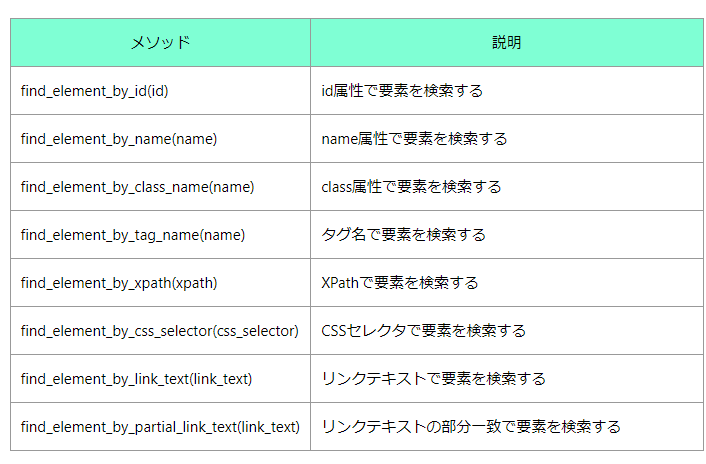

という詳しいサイトがあります。車輪の再発明はしない主義なので新しいテキストを作る気はありません。スクレイピングをするときには[図解！PythonでSeleniumを使ったスクレイピングを徹底解説！](https://ai-inter1.com/python-selenium/) を参照するといいでしょう。

要素を指定するのにhtmlを参照しなければなりません。ブラウザ上で右クリックをし、検証をクリックしてください。これでページのソースがわかります。

今回は見やすさを重視して[阿部寛のホームページ](http://abehiroshi.la.coocan.jp/)にアクセスしてみましょう

## 文字の入力とボタンのクリック
ある要素に対して文字を入力するには

```
要素.send_keys("入力したい文字")
```
とします．例えば

In [19]:
driver = webdriver.Chrome(executable_path=path)
driver.get('https://google.com')
searchForm = driver.find_element(By.XPATH,"//input[@title='検索']")
searchForm.send_keys("麻婆豆腐")

 とすると検索ボックスに「麻婆豆腐」と入力できましたね．
 
 さて実際に検索する時には二つの方法がありますがここでは「Google 検索」のボタンをクリックして検索することにしましょう．
 
 ボタンをクリックするには
 ```
 要素.click()
 ```
 でOKです．実際にやってみましょう．

In [20]:
searchButton = driver.find_element(By.XPATH,"//input[@value='Google 検索']")
searchButton.click()

In [ ]:
for elem_h3 in driver.find_elements(By.XPATH,'//a/h3'):
    elem_a = elem_h3.find_elements(By.XPATH,'..')  
    print(elem_h3.text)

In [24]:
driver.quit()

自動でやりたいときに、毎回Chromeの画面が見えてても困るという場合は

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(executable_path=path,options=options)

という感じでheadlessオプションを追加してあげるとよい。

In [ ]:
driver.get('https://google.com')
searchForm = driver.find_element(By.XPATH,"//input[@title='検索']")
searchForm.send_keys("麻婆豆腐")
driver.get_screenshot_as_file(f"screenshot.png")
searchButton = driver.find_element(By.XPATH,"//input[@value='Google 検索']")
searchButton.click()
for elem_h3 in driver.find_elements(By.XPATH,'//a/h3'):
    elem_a = elem_h3.find_elements(By.XPATH,'..')  
    print(elem_h3.text)

In [25]:
driver.quit()